In [2]:
from matplotlib import pyplot as plt
import pandas as pd
# LEITURA DOS DADOS 
dadosTech = pd.read_csv(r"A:\ProjetoAnaliseDadosTechMahindra\dados.csv", encoding='latin1', dtype={'priority': str})

#CRIANDO UMA NOVA TABELA PARA LEITURA COM NOMES ESPECIFICOS E COLUNAS ESPECIFICAS
novaTableTechDados = dadosTech[['number','priority', 'state', 'assigned_to', 'sys_class_name']].copy()
novaTableTechDados.columns = ['numero','prioridade', 'estado', 'atribuido', 'tipo de tarefa']
display(novaTableTechDados)






C:\Users\danil\AppData\Local\Temp\ipykernel_19088\1225235851.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  dadosTech = pd.read_csv(r"A:\ProjetoAnaliseDadosTechMahindra\dados.csv", encoding='latin1', dtype={'priority': str})


,numero,prioridade,estado,atribuido,tipo de tarefa
0,INC2696753,3 - Médio(a),Na Fila,NaN,Incidente
1,INC2697486,3 - Médio(a),Na Fila,NaN,Incidente
2,INC2697689,4 - Baixo(a),Na Fila,NaN,Incidente
3,INC2698620,4 - Baixo(a),Na Fila,NaN,Incidente
4,INC2699294,3 - Médio(a),Na Fila,NaN,Incidente
...,...,...,...,...,...
577179,RITM14211555,4 - Baixo(a),Trabalho em Andamento,GUSTAVO MARTINEZ,Item solicitado
577180,RITM14211557,4 - Baixo(a),Entregue,ESTRELLITA DEL CARMEN MURILLO,Item solicitado
577181,RITM14211561,4 - Baixo(a),Entregue,DEISSY NAYELI MARTINEZ,Item solicitado
577182,RITM14211563,4 - Baixo(a),Entregue,RPA Ticket Reduction 1,Item solicitado


prioridade
4 - Baixo(a)        538242
3 - Médio(a)         27529
2 - Alto(a)           3587
Low                   3226
5 - Planejamento      2833
1 - Crítico           1487
Name: count, dtype: int64


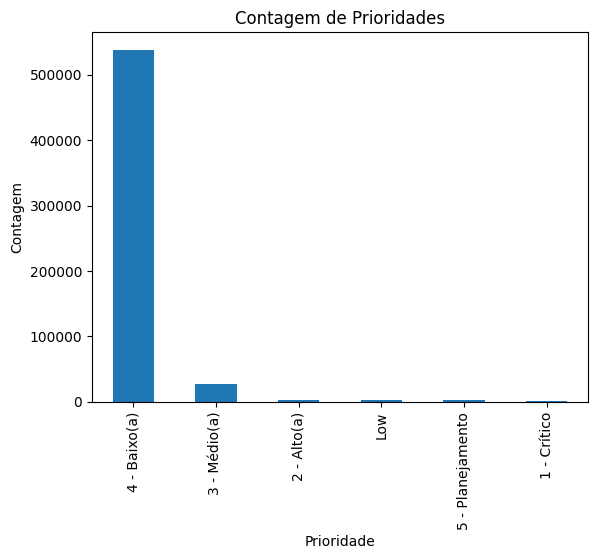

In [53]:
# DADOS DE PRIORIDADE TRATADOS 
tratagem_prioridade = ['5 - Planejamento', '4 - Baixo(a)', '3 - Médio(a)', '2 - Alto(a)', '1 - Crítico', 'Low']
dados_tratados = novaTableTechDados[novaTableTechDados['prioridade'].isin(tratagem_prioridade)]
contagem_prioridade_tratada = dados_tratados['prioridade'].value_counts()

print(contagem_prioridade_tratada)

contagem_prioridade_tratada.plot(kind='bar')
plt.title('Contagem de Prioridades')
plt.xlabel('Prioridade')
plt.ylabel('Contagem')
plt.show()


In [56]:
# CHAMADO EM BAIXA PRIORIDADE E SEU ESTADO NA FILA
chamados_baixo = novaTableTechDados[novaTableTechDados['prioridade'] == '4 - Baixo(a)']
estados_interessantes = ['Aberto', 'Na Fila', 'Trabalho em Andamento', 'Entregue', 'Pendente ', 'Encerrado', 'Em Andamento', 'Em Aberto ', 'Canceled']
contagem_estados_baixo = chamados_baixo['estado'].value_counts()
contagem_estados_baixo.sort_values(ascending=False)


estado
Aberto em                479334
Na Fila                   16603
Trabalho em Andamento     10966
Entregue                   7415
Pendente                   5409
Encerrado                  5129
Em Andamento               2777
Em Aberto                  2313
Canceled                   2022
Resolvido                  1322
Cancelado                  1236
Closed Canceled             891
Delivered                   632
Em Espera                   544
Novo                        405
Fechado Incompleto          399
Fechado Completo            274
Encerrado Totalmente        213
Cancelado(a)                188
Atendido                     27
Novo(a)                      23
Closed                       17
Avaliar                      17
Root Cause Analysis          17
Encerrado Incompleto         17
Correção em Andamento        12
Cancel                       11
Trabalho em andamento         8
Completed                     7
Root Cause Review             6
Complete                      5
A

estado
Na Fila                  16603
Trabalho em Andamento    10966
Entregue                  7415
Encerrado                 5129
Em Andamento              2777
Canceled                  2022
Name: count, dtype: int64

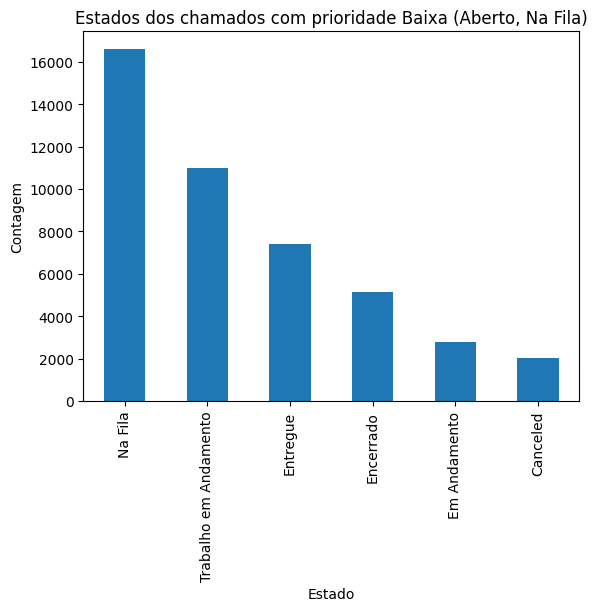

In [55]:
# FILTRA OS ESTADO DOS CHAMDADOS PARA LIMITA OS DADOS ANALISADOS
chamados_baixo_interessantes = chamados_baixo[chamados_baixo['estado'].isin(estados_interessantes)]
contagem_estados_interessantes = chamados_baixo_interessantes['estado'].value_counts()
contagem_estados_interessantes.sort_values(ascending=False)
display(contagem_estados_interessantes)

contagem_estados_interessantes.plot(kind='bar')
plt.title('Estados dos chamados com prioridade Baixa (Aberto, Na Fila)')
plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.show()

numero
REQ    482728
RIT     49487
INC     40479
PRB      4433
PTA        47
KFT        10
Name: count, dtype: int64

'media'

96197

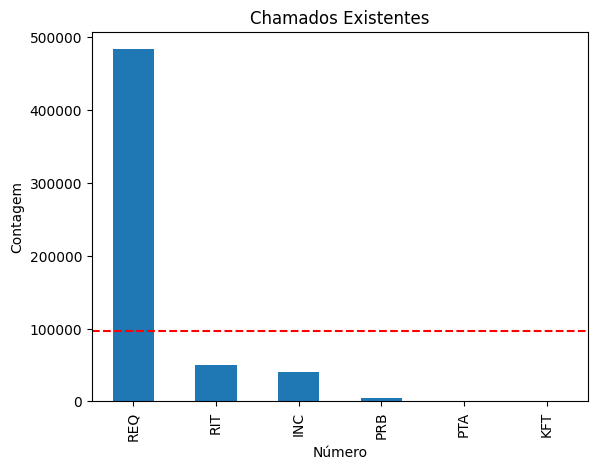

In [15]:

contagem_numeros['primeiros_tres_caracteres'] = novaTableTechDados['numero'].str.slice(0, 3)
contagem_primerios_tres_caracteres = contagem_numeros['primeiros_tres_caracteres'].value_counts()
contagem_primerios_tres_caracteres.plot(kind='bar')
display(contagem_primerios_tres_caracteres)
media = contagem_primerios_tres_caracteres.mean()
nova_media = int(media)
print("Media por dia ")
display(f"Temos por dia a media de {nova_media} Requerimentos por dia:")

plt.title('Chamados Existentes')
plt.axhline(media, color='red', linestyle='--', label='Média')
plt.xlabel('Número')
plt.ylabel('Contagem')

# Exibir o gráfico
plt.show()



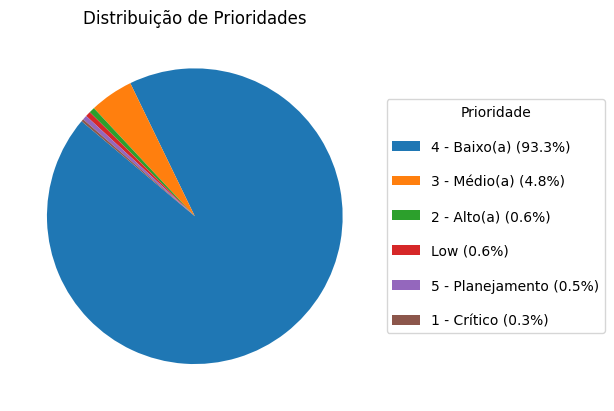

In [75]:
# GRAFICO EM PIE
chamados_baixo_interessantes = chamados_baixo[chamados_baixo['estado'].isin(estados_interessantes)]
contagem_estados_interessantes = chamados_baixo_interessantes['estado'].value_counts()
contagem_estados_interessantes.sort_values(ascending=False)


contagem_prioridade_tratada.plot(kind='pie', startangle=140, labels=None) 
plt.legend(labels=[f'{label} ({value:.1f}%)' for label, value in zip(contagem_prioridade_tratada.index, contagem_prioridade_tratada/contagem_prioridade_tratada.sum()*100)], 
           title="Prioridade", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), labelspacing=1.5)
plt.title('Distribuição de Prioridades')  
plt.ylabel('')  
plt.show()

